1. Input (Before PCA) -> n original column
2. Input  (Before PCA) -> Correlated
3. Output (After PCA)  -> 'n' principal component 
4. Output (After PCA) -> 1. Uncorrelated
                      2. Ordered by variance
 

Study :- Eigen Vector and Eigen Values

PCA Weight Calculation
1. Fing weight aij the maximum variance of PC, while keeping PC uncorrelated to other PCs
2. The covarance matrix of the Xs is needed
3. Apply Eigenvector and Eigenvalue decomposition to obtain the weights
4. Standardize the data before applying PCA nn 

high valience = lot of information

In [1]:
import pandas as pd
import numpy as np

uni1 = pd.read_excel("University_Clustering.xlsx")
uni1.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [2]:

uni1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [3]:

uni = uni1.drop(["State"], axis = 1)

In [5]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [6]:
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [7]:
uni.data = uni.iloc[:, 1:]

C:\Users\Sriya\AppData\Local\Temp\ipykernel_5660\1699649321.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  uni.data = uni.iloc[:, 1:]


In [15]:
uni_normal = scale(uni.data)
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [16]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(uni_normal)

In [18]:
pca_values

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

In [20]:
var = pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [21]:
pca.components_
pca.components_[0]

array([-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
       -0.37940403])

In [28]:
pca.components_[:]

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

In [29]:
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

Text(0, 0.5, 'Comulative Sum')

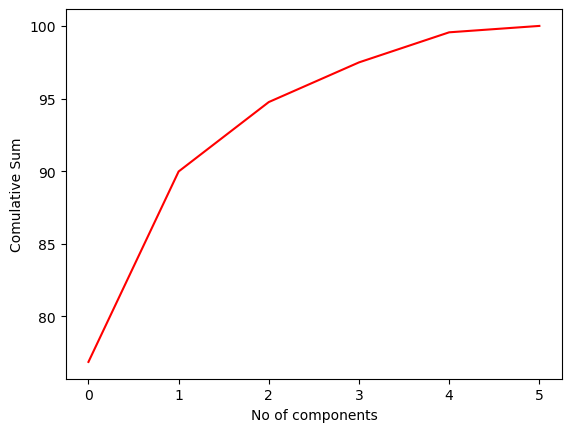

In [38]:
plt.plot(var1, color = "red")
plt.xlabel("No of components")
plt.ylabel("Comulative Sum")

In [31]:
pca_values

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

In [32]:
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5"
final = pd.concat([uni.Univ, pca_data.iloc[:, 0:3]], axis = 1)

In [33]:
final

,Univ,comp0,comp1,comp2
0,Brown,-1.009874,-1.064310,0.081066
1,CalTech,-2.822238,2.259045,0.836829
2,CMU,1.112466,1.631209,-0.266787
3,Columbia,-0.741741,-0.042187,0.060501
4,Cornell,-0.311912,-0.635244,0.010241
5,Dartmouth,-1.696691,-0.344363,-0.253408
6,Duke,-1.246821,-0.490984,-0.032094
7,Georgetown,-0.338750,-0.785169,-0.493585
8,Harvard,-2.374150,-0.386539,0.116098
9,JohnsHopkins,-1.403277,2.119515,-0.442827


0     Text(-1.0098744455993167, -1.0643096230604419,...
1     Text(-2.822237814982294, 2.2590445797474588, '...
2     Text(1.1124657737358874, 1.6312088857268023, '...
3     Text(-0.7417412174820466, -0.04218746985378179...
4     Text(-0.31191206444998126, -0.6352435723731156...
5     Text(-1.6966908936207192, -0.34436328281901635...
6     Text(-1.2468209314771226, -0.49098366243312136...
7     Text(-0.3387497844048185, -0.7851685885690037,...
8     Text(-2.3741501274374652, -0.38653888333818587...
9     Text(-1.4032773928408784, 2.1195150254899526, ...
10    Text(-1.7261033180164154, 0.08823711605506245,...
11    Text(-0.4508574804191845, -0.01113294798756851...
12    Text(0.04023814047186048, -1.0092043841920488,...
13    Text(3.233730340062899, -0.37458048720271764, ...
14    Text(-2.2362650192392417, -0.37179329385795906...
15    Text(5.172992120406335, 0.7799153464035302, 'P...
16    Text(-1.6996437743935038, -0.30559745302753183...
17    Text(4.578146002434017, -0.347591363409725

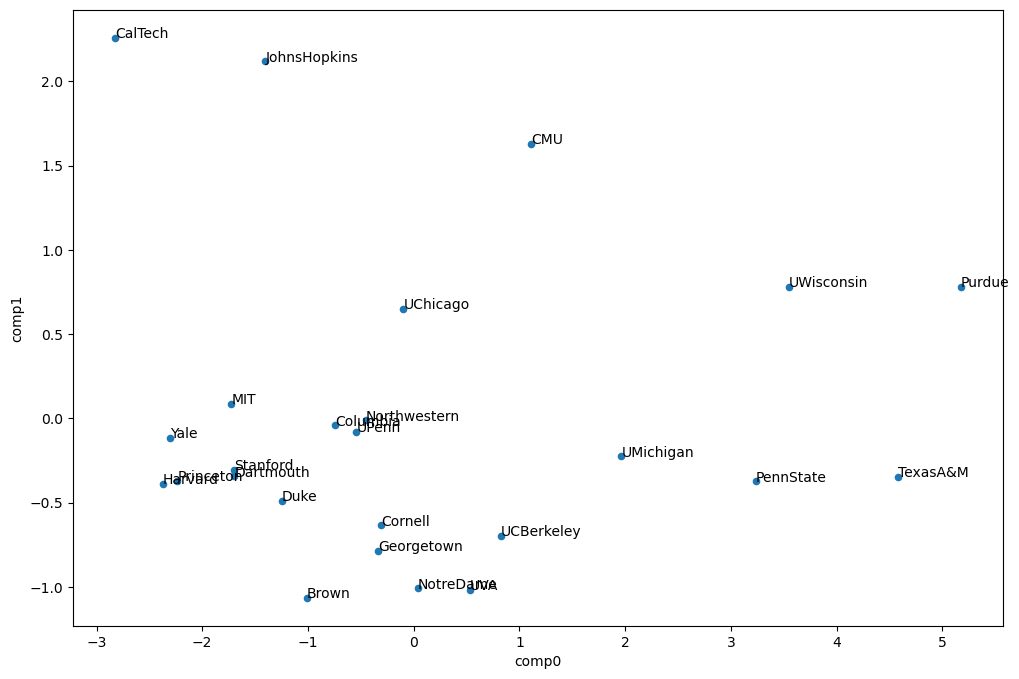

In [34]:
import matplotlib.pylab as plt
ax = final.plot(x='comp0', y='comp1', kind='scatter',figsize=(12,8))
final[['comp0', 'comp1', 'Univ']].apply(lambda x: ax.text(*x), axis=1)